<a href="https://colab.research.google.com/github/Akshayhabib/Machine-and-Deep-learning-projects/blob/main/pizza_classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-gpu==2.0.0
#restart the runtime

In [ ]:
import tensorflow as tf 
print(tf.__version__)

2.0.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **importing** all the packages **

In [ ]:
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
import time   # time1 = time.time(); print('Time taken: {:.1f} seconds'.format(time.time() - time1))
import warnings
from tqdm import tqdm_notebook as tqdm
import itertools
warnings.filterwarnings("ignore")
SEED = 42   # set random seed


In [ ]:
import  os
os.chdir('/content/drive/MyDrive/DEEP LEARNING EXAM/ann dataset/Pizza Refund')

In [ ]:
!dir

pizza_model_ANN.h5  test  train


In [ ]:
print('[INFO] loading image...')
time1=time.time()
data=[]

labels=[]

classes=['Burnt_pizza','Good_pizza']

imagePaths=sorted(list(paths.list_images('train')))
random.seed(SEED)
random.shuffle(imagePaths)

#progress bar

with tqdm(total=len(imagePaths)) as pbar:

  for imagePath in imagePaths:
    image=cv2.imread(imagePath)
    image=cv2.resize(image,(32,32)).flatten()
    data.append(image)

    label=imagePath.split(os.path.sep)[-2]
    #label=1 if label =='Good_pizza' else 0
    if label == "Burnt_pizza":
        label = 0
        
    elif label == "Good_pizza":
        label = 1
    labels.append(label)
    pbar.update(1)

#
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)



[INFO] loading image...


  0%|          | 0/709 [00:00<?, ?it/s]

model building

In [ ]:
(trainX,testX,trainY,testY)=train_test_split(data,labels,test_size=0.2,random_state=SEED)

In [ ]:
trainX.shape

(567, 3072)

In [ ]:
testX.shape

(142, 3072)

In [ ]:
trainX

array([[0.86666667, 0.85882353, 0.81960784, ..., 0.23921569, 0.2627451 ,
        0.80784314],
       [0.09019608, 0.49803922, 0.85098039, ..., 0.2745098 , 0.63921569,
        0.88627451],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [0.07058824, 0.16078431, 0.37647059, ..., 0.86666667, 0.89411765,
        0.95294118],
       [0.06666667, 0.09019608, 0.2       , ..., 0.17254902, 0.19215686,
        0.2627451 ],
       [0.23921569, 0.25098039, 0.25098039, ..., 0.7254902 , 0.72156863,
        0.71764706]])

In [ ]:
testY

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

data preprocessing

In [ ]:
trainY=to_categorical(trainY,num_classes=2)
testY=to_categorical(testY,num_classes=2)
#[0,1] --burnt_pizza
#[1,0] --good_pizza

In [ ]:
testY

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [ ]:
sample_image=(trainX[5]*255).astype('int')

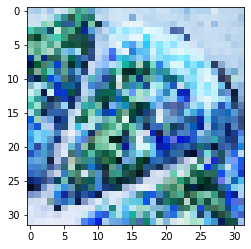

In [ ]:
plt.imshow(sample_image.reshape(32,32,3))

In [ ]:
model=Sequential()

model.add(Dense(units=1024,input_shape=(3072,),kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(units=512,kernel_initializer='uniform', activation='relu'))

model.add(Dense(units=2,kernel_initializer='uniform', activation='softmax'))

In [ ]:
#compile model


INIT_LR=0.001
EPOCHS=250
print('[INFO] compiling neural network...')
opt=SGD(lr=INIT_LR)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

[INFO] compiling neural network...


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 3,672,578
Trainable params: 3,672,578
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=EPOCHS,batch_size=64)

Train on 567 samples, validate on 142 samples
Epoch 1/250
567/567 [==============================] - 1s 2ms/sample - loss: 0.6855 - accuracy: 0.5414 - val_loss: 0.6681 - val_accuracy: 0.5563
Epoch 2/250
567/567 [==============================] - 0s 132us/sample - loss: 0.6398 - accuracy: 0.6208 - val_loss: 0.6705 - val_accuracy: 0.5493
Epoch 3/250
567/567 [==============================] - 0s 101us/sample - loss: 0.6320 - accuracy: 0.6208 - val_loss: 0.6732 - val_accuracy: 0.5493
Epoch 4/250
567/567 [==============================] - 0s 129us/sample - loss: 0.6185 - accuracy: 0.6314 - val_loss: 0.6734 - val_accuracy: 0.5493
Epoch 5/250
567/567 [==============================] - 0s 101us/sample - loss: 0.6222 - accuracy: 0.6349 - val_loss: 0.6703 - val_accuracy: 0.5493
Epoch 6/250
567/567 [==============================] - 0s 124us/sample - loss: 0.6120 - accuracy: 0.6314 - val_loss: 0.6674 - val_accuracy: 0.5493
Epoch 7/250
567/567 [==============================] - 0s 108us/sample - l

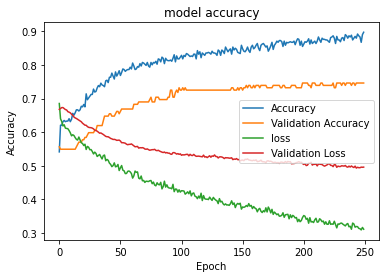

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
pred_prob = model.predict(testX, batch_size=32)

[INFO] evaluating network...


In [ ]:
pred_prob

array([[0.02606496, 0.97393507],
       [0.06013719, 0.9398628 ],
       [0.09002305, 0.90997696],
       [0.5033497 , 0.49665028],
       [0.91813767, 0.08186234],
       [0.03950936, 0.9604906 ],
       [0.89511293, 0.1048871 ],
       [0.7217327 , 0.27826735],
       [0.44451436, 0.55548567],
       [0.09248137, 0.9075187 ],
       [0.29756552, 0.7024345 ],
       [0.2978851 , 0.70211494],
       [0.11683861, 0.8831614 ],
       [0.58029467, 0.41970533],
       [0.32963583, 0.67036414],
       [0.03694843, 0.9630516 ],
       [0.24356738, 0.75643265],
       [0.35284016, 0.6471599 ],
       [0.86931264, 0.13068734],
       [0.1940835 , 0.8059165 ],
       [0.14411199, 0.855888  ],
       [0.02127695, 0.97872305],
       [0.52966523, 0.4703348 ],
       [0.26308808, 0.7369119 ],
       [0.3681368 , 0.6318632 ],
       [0.16966476, 0.83033526],
       [0.09947247, 0.9005275 ],
       [0.11235203, 0.887648  ],
       [0.06346732, 0.93653274],
       [0.5358893 , 0.46411067],
       [0.

In [ ]:
#Convert testY and y_pred into 1's and 0 for classification report
# Note: gooo_pizza -> 1 and burnt_pizza-> 0
test_y = [ np.argmax(i)  for i in testY]
pred_y = [ np.argmax(i)  for i in pred_prob]

In [ ]:
pred_y

[1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1]

In [ ]:
def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.tight_layout()
    
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    print("-----------------------------------------------------")
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

Confusion Matrix, Without Normalisation


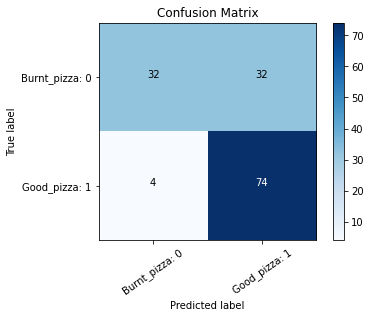

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.89      0.50      0.64        64
           1       0.70      0.95      0.80        78

    accuracy                           0.75       142
   macro avg       0.79      0.72      0.72       142
weighted avg       0.78      0.75      0.73       142

-----------------------------------------------------
Accuracy of the model:  0.7464788732394366


In [ ]:
plot_confusion_metrix(test_y, pred_y,classes=["Burnt_pizza: 0","Good_pizza: 1"])

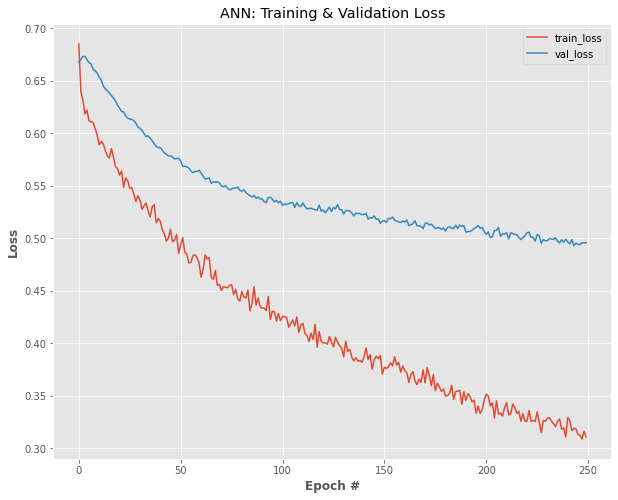

In [ ]:
#Generate Plots for acc and val
 # plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, hist.history["loss"], label="train_loss")
plt.plot(N, hist.history["val_loss"], label="val_loss")
plt.title("ANN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

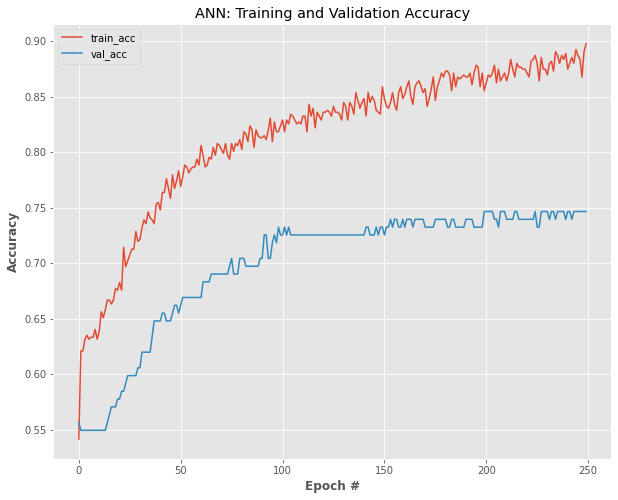

In [ ]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, hist.history["accuracy"], label="train_acc")
plt.plot(N, hist.history["val_accuracy"], label="val_acc")
plt.title("ANN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

In [ ]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save('pizza_model_ANN.h5')

[INFO] serializing network and label binarizer...


In [ ]:
#Making predictions using your trained tensorflow model

# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2
import imutils
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#!pip uninstall h5py
#!pip install h5py==2.10.0

In [ ]:
# # load the model 
# print("[INFO] loading network and...")
model1=load_model('pizza_model_ANN.h5')


In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

  0%|          | 0/40 [00:00<?, ?it/s]

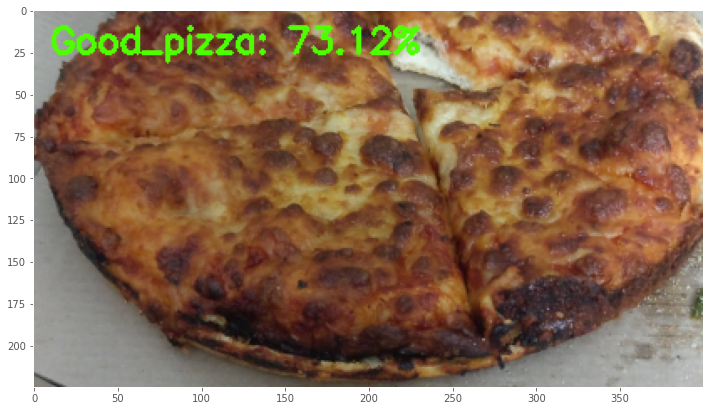

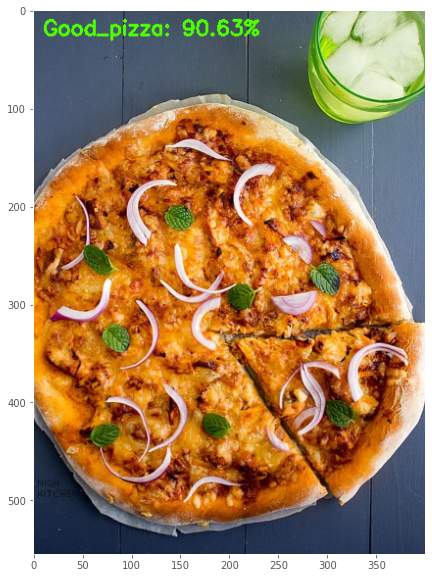

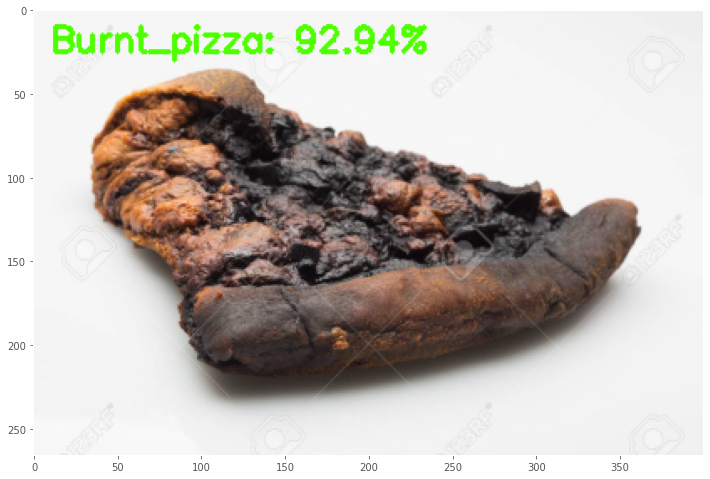

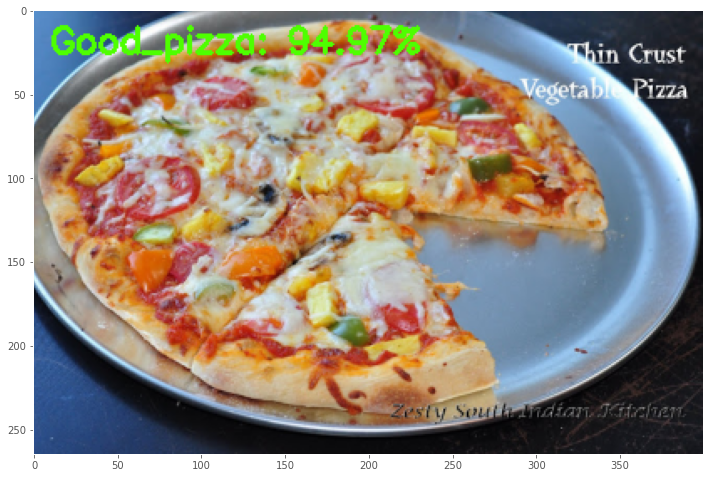

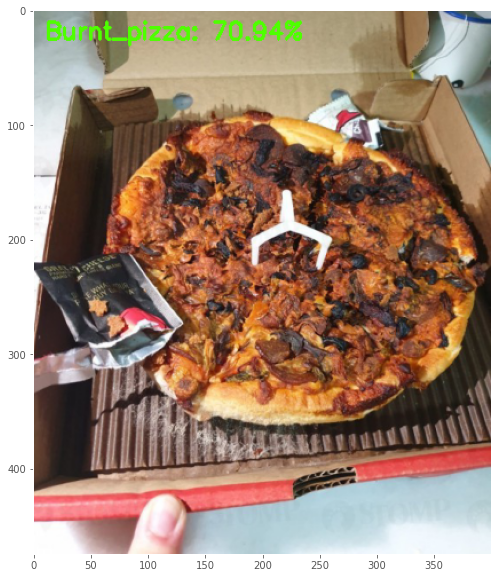

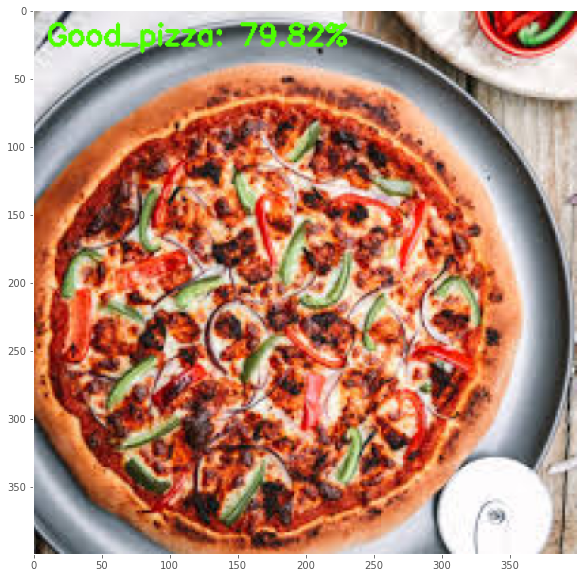

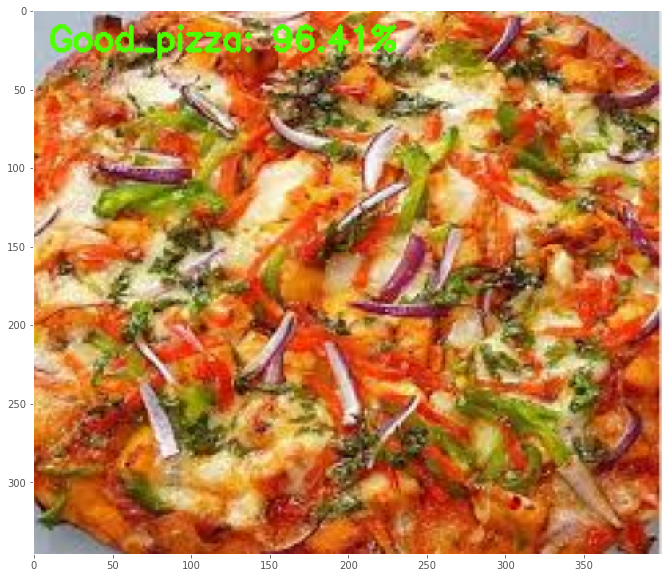

In [ ]:
# load the input image and resize it to the target spatial dimensions
width = 32
height = 32

# grab the image paths and randomly shuffle them
testImagePaths = sorted(list(paths.list_images('test')))   # test data folder with random images


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        image = cv2.imread(imagePath)
        output = image.copy()
        image = cv2.resize(image, (width, height))

        # scale the pixel values to [0, 1]
        image = image.astype("float") / 255.0

        # for a simple fully-connected network, flatten the image
        image = image.flatten()
        image = image.reshape((1, image.shape[0]))


        # make a prediction on the image
        preds = model.predict(image)

        # find the class label index with the largest corresponding probability
        i = preds.argmax(axis=1)[0]
        label = classes[i]
        
        label = "{}: {:.2f}%".format(label, preds[0][i] * 100)

        
        output = imutils.resize(output, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (0, 255, 78), 2)
        
        # convert img to rgb format and display in noteboo
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)

#         print("############################")
#         print("image: {}".format(os.path.split(imagePath)[-1]))
#         print("predicted label: {}".format(label))
#         print("Confidence: {}".format(preds[0][i]))
        
        pbar.update(1)